In [13]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from matplotlib import ticker
%matplotlib inline
DATADIR = "../data/"
plt.rcParams['figure.figsize'] = [10, 6]

In [17]:

def graph500_plotter(input_file, system_string, graph500_scale):
    df = pd.read_csv(DATADIR+input_file)
    for metric, label, scaling_factor in [
        ("total_runtime[s]", "Time in seconds", 1),
        ("bfs_harmonic_mean_teps", "BFS GTEPS", 1000000000),
        ("sssp_harmonic_mean_teps", "SSSP GTEPS", 1000000000)
    ]:
        pivoted_df = df[df.scale == graph500_scale].pivot_table(columns=["taskspernode","mpi_modules","prep_commands"], 
                                    index=["nodes"],
                                    values=metric)
        ax = pivoted_df.div(scaling_factor).plot(
            grid=True,
            xlabel="Nodes",
            ylabel=label,
            linewidth=4,
            title=input_file+": Graph500 on "+system_string+" "+label+" using scale "+str(graph500_scale)
        )
        ax.set_xscale("log", base=2)
        ax.set_yscale("log", base=2)
        ax.set_xticks(ticks=pivoted_df.index)
        ax.set_xticklabels(labels=pivoted_df.index.values)
        n = 32
        min_r = pivoted_df.div(scaling_factor).min().min()
        max_r = pivoted_df.div(scaling_factor).max().max()
        y_ticks = [2**j for j in range(-5,n+1) if 2**(j+1) > min_r and 2**(j-1) < max_r]
        ax.set_yticks(ticks=y_ticks)
        ax.set_yticklabels(labels=y_ticks)
        ax.tick_params(which="major", width=1.00, length=7)
        ax.tick_params(which="minor", width=0.25, length=3)
        ax.yaxis.set_major_locator(ticker.LogLocator(base = 2.0, numticks = 10))
        

# Graph500 on JUWELS Booster

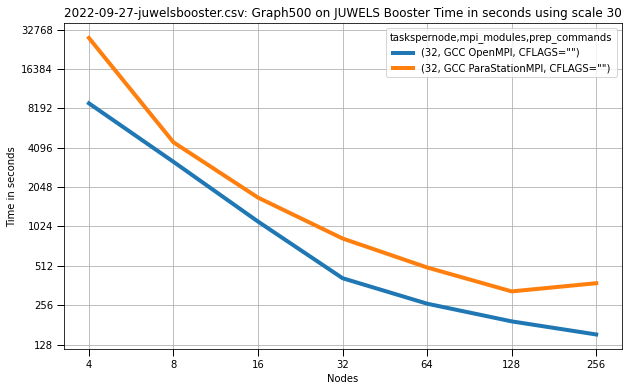

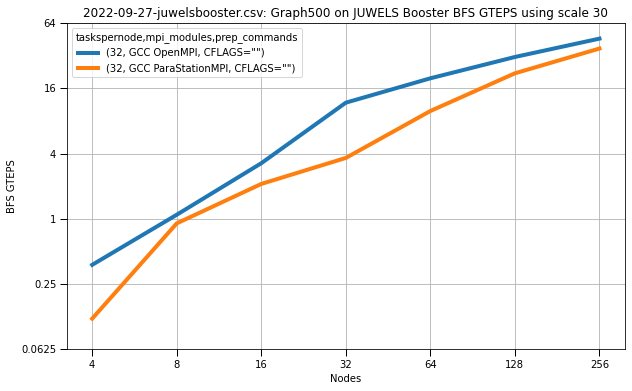

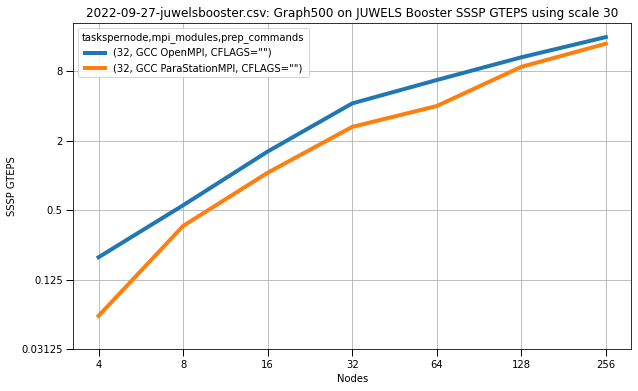

In [18]:
graph500_plotter("2022-09-27-juwelsbooster.csv", "JUWELS Booster", 30)

# Graph500 on JURECA-DC

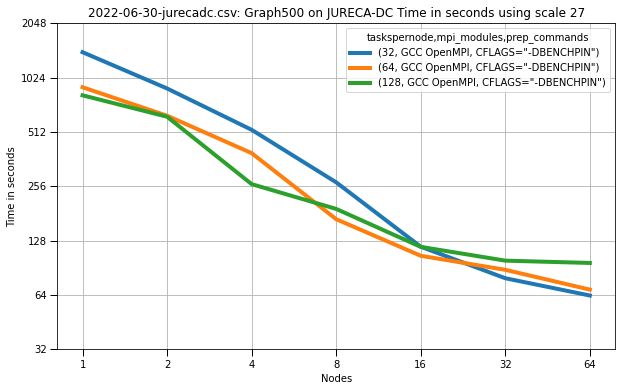

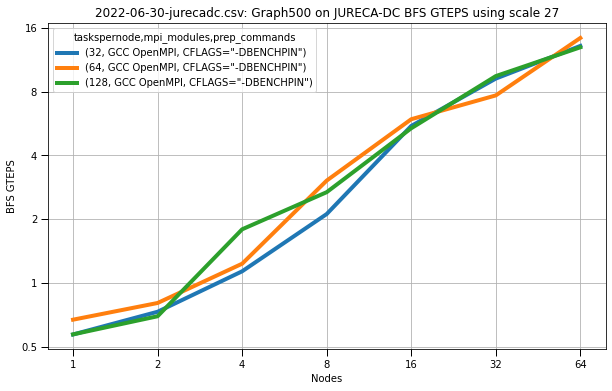

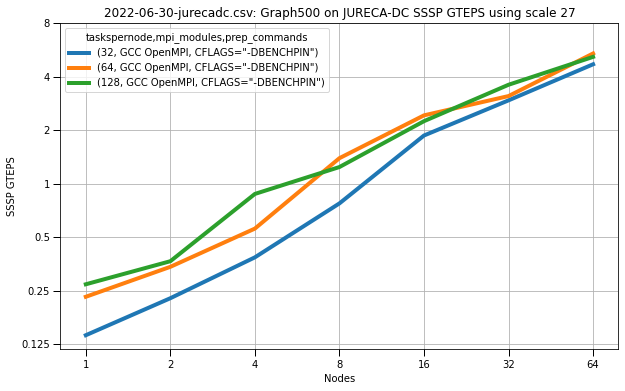

In [19]:
graph500_plotter("2022-06-30-jurecadc.csv", "JURECA-DC", 27)